# Clase #6

In [1]:
import sys
sys.dont_write_bytecode = True

import math
import numpy as np
import cv2 as cv
from skimage.restoration import denoise_nl_means
import lib.image_utils as ImgUtils
%matplotlib inline

import contextlib
with contextlib.redirect_stdout(None):
    np.seterr(divide = 'ignore')

In [2]:
image = cv.imread('./images/im10-1.jpg', cv.IMREAD_GRAYSCALE)

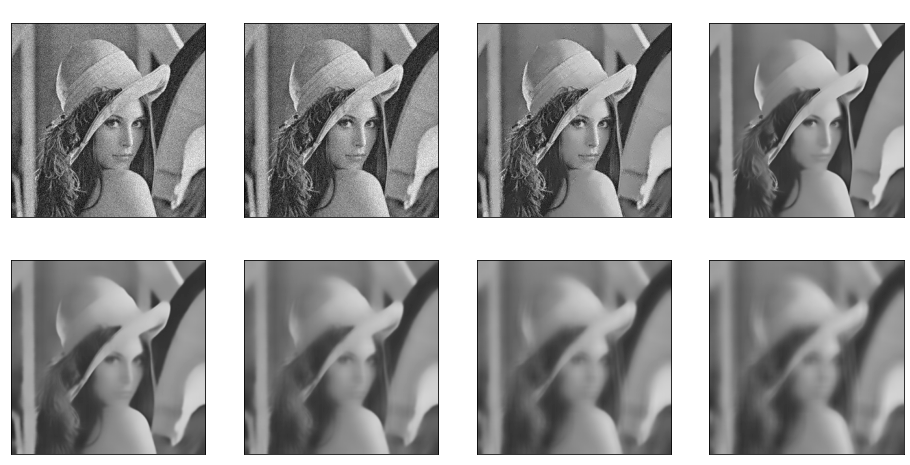

In [3]:
denoised = []
labels = ['Original']
for i in range(7):
    tmp = np.zeros_like(image)
    h = 3 * (i + 1)**2
    cv.fastNlMeansDenoising(image, tmp, h = h)
    denoised.append(tmp)
    labels.append(f'h = {h}')

ImgUtils.imshow2(image, *denoised, cols = 4, titles = labels)

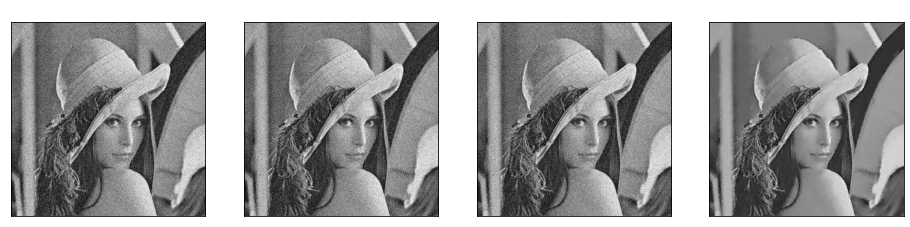

In [4]:
denoised = []
labels = ['Original']
for i in range(1, 7, 2):
    tmp = np.zeros_like(image)
    size = i * 7 * 3
    h = 2 * i + 1
    cv.fastNlMeansDenoising(image, tmp, h = h, searchWindowSize = size)
    denoised.append(tmp)
    labels.append(f'windowSize = {size}, h = {h}')

ImgUtils.imshow2(image, *denoised, cols = 4, titles = labels)

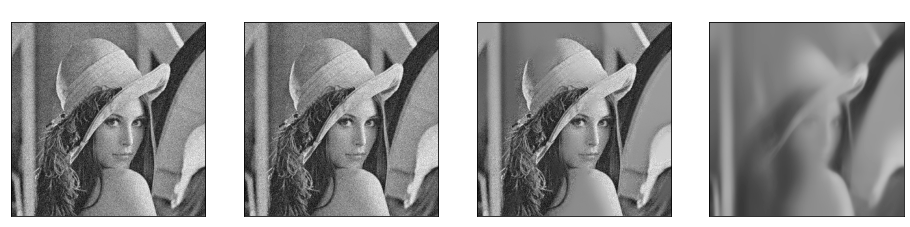

In [5]:
denoised = []
labels = ['Original']
for i in range(3):
    tmp = np.zeros_like(image)
    h = 3 * (i + 1)**2
    size = 2 * h + 1
    cv.fastNlMeansDenoising(image, tmp, h = h, templateWindowSize = size, searchWindowSize = 3*size)
    denoised.append(tmp)
    labels.append(f'h = {h}, windowSize = {size}')

ImgUtils.imshow2(image, *denoised, titles = labels, cols = 4)

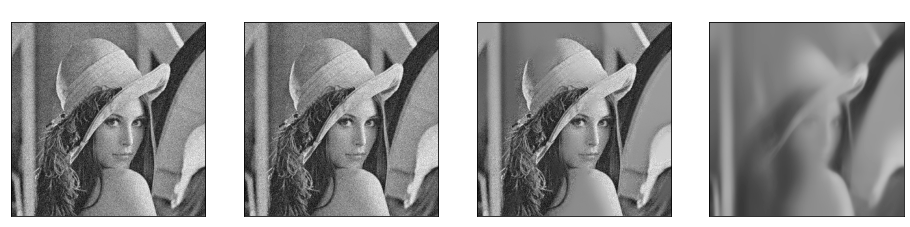

In [7]:
denoised = []
labels = ['Original']
for i in range(3):
    tmp = np.zeros_like(image)
    h = 3 * (i + 1)**2
    size = 2 * h + 1
    cv.fastNlMeansDenoising(image, tmp, h = h, templateWindowSize = size, searchWindowSize = 3*size)
    denoised.append(tmp)
    labels.append(f'h = {h}, windowSize = {size}')

ImgUtils.imshow2(image, *denoised, titles = labels, cols = 4)

In [ ]:
image2 = cv.imread('./images/im11-1.jpg')

ImgUtils.imshow2(
    image2,
    denoise_nl_means(image2, h = 0.05, patch_size = 3, patch_distance = 5, channel_axis = -1),
    denoise_nl_means(image2, h = 1, patch_size = 5, patch_distance = 9, channel_axis = -1)
)